In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import random
from statsmodels.tsa.seasonal import seasonal_decompose


import json
import requests
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#import fredapi 
#import yfinance as yf

# Read in the data using json from the BLC Public API

- CUUR0000SA0 unadjusted
- CUSR0000SA0 seasonaly adjusted 
- [link](https://beta.bls.gov/dataQuery/find?fq=survey:[cu]&s=popularity:D)

In [67]:
# Will not use it as I will hit the limit for API request. I will load from file. This can be removed once we are ready for deployment. 
# headers = {'Content-type': 'application/json'}
 
# all_json_data = []
# step = 20 #in years
# for year in range (1950,2025,step):
#     parameters = json.dumps({"registrationkey":"YourKeyHere", "seriesid":['CUUR0000SA0'], "startyear":str(year), "endyear":str(year+step), "calculations":"true"})
#     response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data = parameters, headers = headers)

#     json_data = json.loads(response.text)
#     all_json_data.append(json_data)

# with open ('all_json_data_unadjusted','w') as outfile:
#     json.dump(all_json_data, outfile)

In [3]:
with open ('all_json_data_unadjusted','r') as openfile:
    all_json_data_unadjusted = json.load(openfile)

In [4]:
with open ('all_json_data_season_adjusted','r') as openfile:
    all_json_data_season_adjusted = json.load(openfile)

# Parse the json data into a dataframe

In [7]:
def parse_json(file):    

    data_dict =dict()

    for section in all_json_data_unadjusted:
        for part in section['Results']['series']:
            for item in part['data']:
                year = item['year']
                month = item['periodName']
                value = item['value']
                data_dict[month+' '+ year] = value
            
    df = pd.DataFrame(data_dict.items(),columns = ['date','CPI'])
    df['CPI'] = df['CPI'].astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    print(df.head())

    return df

In [16]:
df = parse_json(all_json_data_season_adjusted)

             CPI
date            
1950-01-01  23.5
1950-02-01  23.5
1950-03-01  23.6
1950-04-01  23.6
1950-05-01  23.7


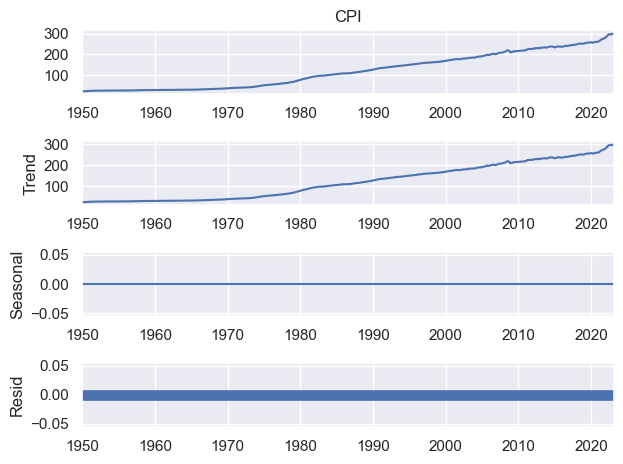

In [18]:
result = seasonal_decompose(df['CPI'], model='additive', period=1)
x = result.plot()

# Visualise and explore the data
## Create Plotly figure of data with slider and a figure with percentage change based on values a year ago. 

In [19]:
# Plot The Data
sns.set()

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.CPI)))

# Set title
fig.update_layout(
    title_text="Consumer Price Index"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [30]:
# Plot percentage
df['pct-change'] =df.CPI.pct_change(periods=12)*100
# Create figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df['pct-change'])))
# Set title
fig.update_layout(
    title_text="Consumer Price Index Percentage Change",
    width=1000,
    height=500
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



Text(0.5, 1.0, 'Percentage Change in CPI')

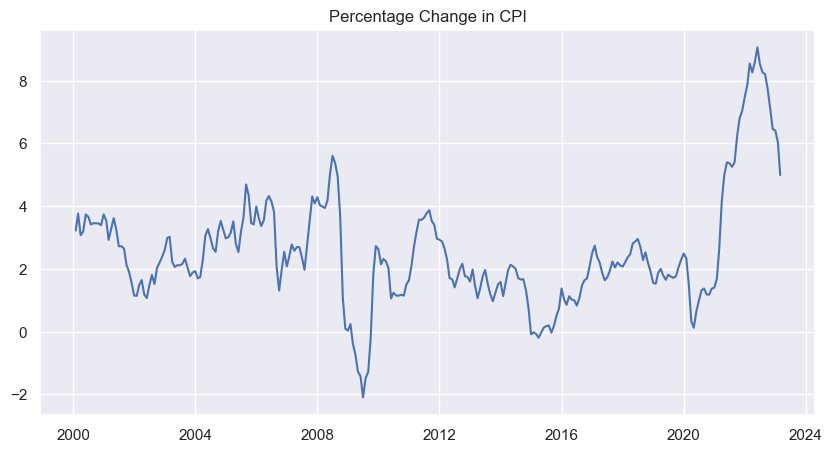

In [24]:
fig, ax  = plt.subplots(figsize = (10,5))
ax.plot(df[df.index>'01/01/2000']['pct-change'])
ax.set_title('Percentage Change in CPI')

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

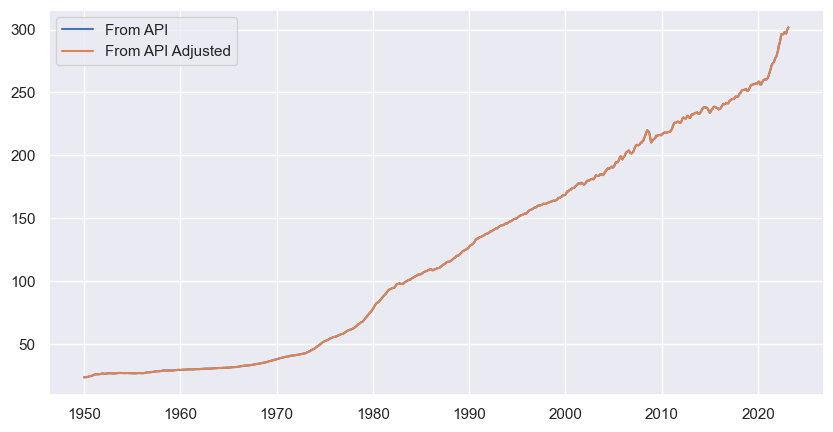

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df['CPI'],label = 'From API')
ax.plot(df_adjusted['CPI'], label = 'From API Adjusted') # df_test2 has seasonality
ax.legend()

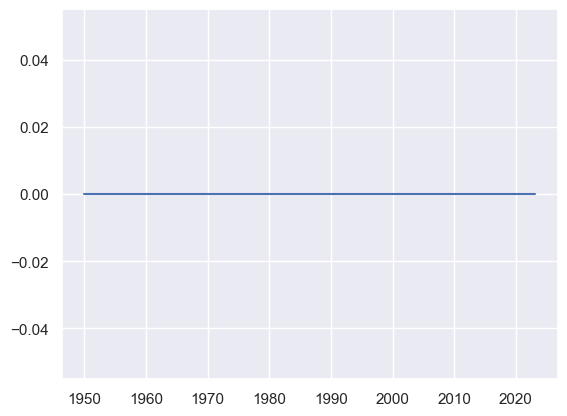

In [13]:
different = df['CPI']-df_adjusted['CPI']
plt.plot(different)

In [36]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_test2['ccpi'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-84.967, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53.746, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-82.460, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-46.744, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=662.382, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-85.747, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-85.108, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80.678, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-91.602, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-86.625, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-89.781, Time=0.67 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-90.754, Time=0.68 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-86.225, Time=0.21 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-94.472, Time=0.78 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-100.0

# Statsmodels Auto Reg and ARIMA

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['CPI'], autolag = 'AIC')

print('1. ADF : ',dftest[0])
print('2. P-Value : ',dftest[1]) # low p-value means time series is stationary
print('3. Number of Lags : ',dftest[2])
print('4. Number of observations used for ADF Regression and Critical val Creation : ',dftest[3])
print('5. Critical Values : ')
for key, val in dftest[4].items():
  print('\t', key, ": ", val)


1. ADF :  2.678337528766279
2. P-Value :  0.9990855679240584
3. Number of Lags :  13
4. Number of observations used for ADF Regression and Critical val Creation :  865
5. Critical Values : 
	 1% :  -3.4379324415517494
	 5% :  -2.864887107873992
	 10% :  -2.568552251328143


c:\Users\Ramin\AppData\Local\Programs\Python\envs\time_series\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



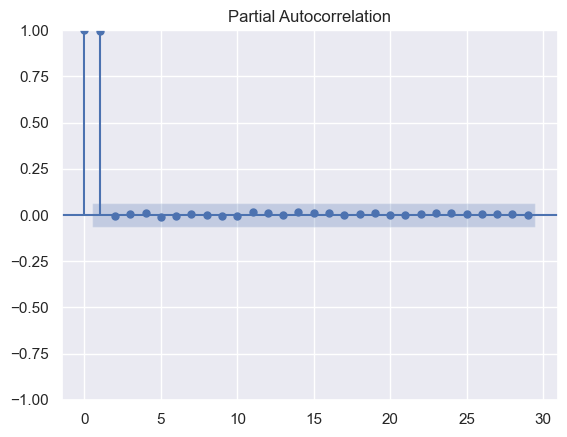

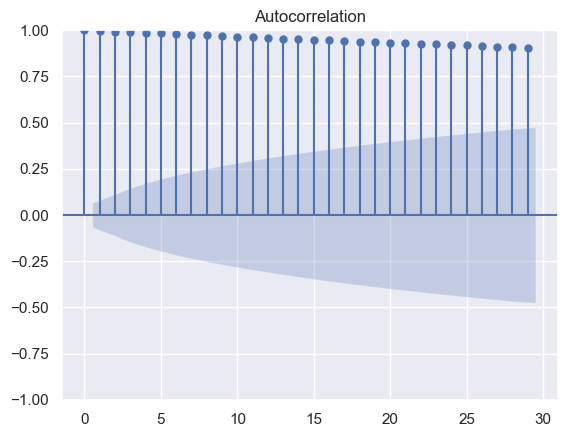

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['CPI'], lags = 29)
acf = plot_acf(df['CPI'], lags = 29)
# for auto regression we use the PACF, as it only has the direct effects. 

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['CPI'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1108.242, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1358.800, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1349.790, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1328.956, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1108.206, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1121.160, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1135.890, Time=0.18 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1107.451, Time=0.30 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1105.667, Time=0.16 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=1107.311, Time=0.29 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=1108.039, Time=0.39 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1106.116, Time=0.53 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 2.913 seconds


# Prophet


In [ ]:

from prophet import Prophet


In [ ]:
df_p = df.reset_index()
df_p.rename(columns={'date':'ds','CPI':'y'}, inplace=True)
df_p['ds'] = df_p['ds'].astype(str)
#del df2['pct-change']

In [ ]:
m = Prophet()
m.fit(df_p)
future = m.make_future_dataframe(periods = 365)
future

09:47:08 - cmdstanpy - INFO - Chain [1] start processing
09:47:08 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,1950-01-01
1,1950-02-01
2,1950-03-01
3,1950-04-01
4,1950-05-01
...,...
1239,2024-02-25
1240,2024-02-26
1241,2024-02-27
1242,2024-02-28


In [ ]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1239,2024-02-25,287.319523,282.863122,291.673779
1240,2024-02-26,286.543140,282.699104,291.057786
1241,2024-02-27,285.722653,281.262240,289.870993
1242,2024-02-28,284.871452,280.524880,288.987353
1243,2024-02-29,284.003395,279.504189,288.030228


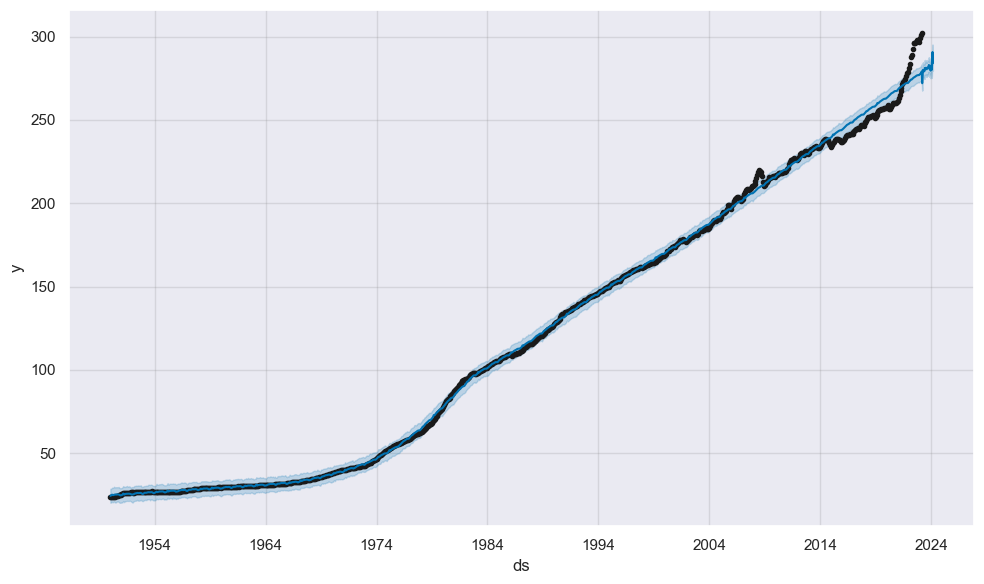

In [ ]:
fig1 = m.plot(forecast)


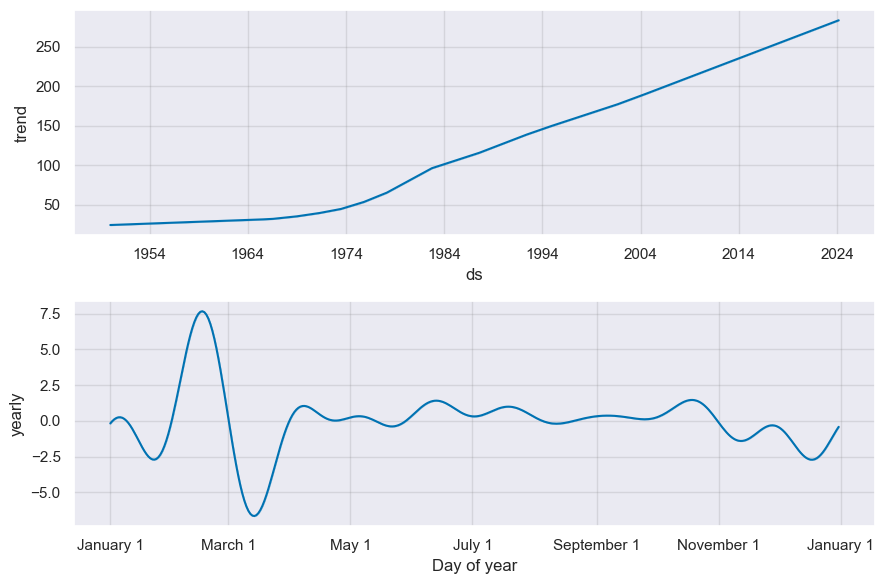

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)
